$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/guylevy/.cache/torch/hub/ultralytics_yolov5_master
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)
YOLOv5 🚀 2023-6-2 Python-3.8.12 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Calculate the number of pixels within a bounding box and the number in the background.
   
   **Hint**: Given you stored the model output in a varibale named 'results', you may find 'results.pandas().xyxy' helpful 
4. Look at the inference results and answer the question below.


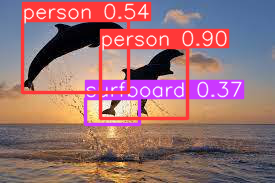

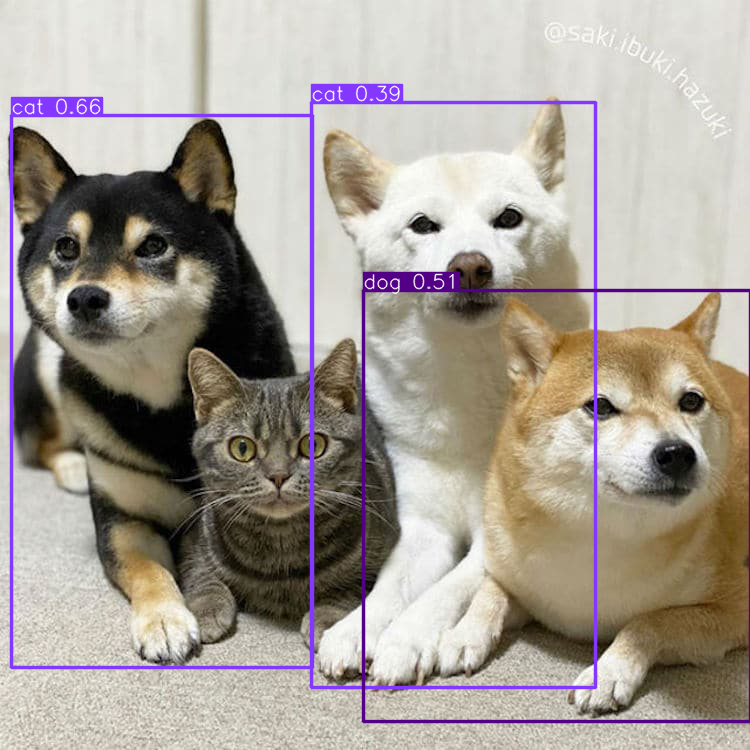

image number 0
number of pixels within a box: 12889
number of pixels in backgroud: 37436

image number 1
number of pixels within a box: 406433
number of pixels in backgroud: 156067



In [2]:
import cv2
import numpy
#Insert the inference code here.
with torch.no_grad():
    # Perform object detection
    results = model([img1, img2])

    # Display images with bounding boxes
    results.show()
    
    images_arrays = [cv2.imread(img1), cv2.imread(img2)]
    for i, img in enumerate(images_arrays):
        # calculate total pixels in image
        total_number_of_pixels = img.shape[0] * img.shape[1]
        
        # initialize boolean array to mark which pixels are in boxes
        in_box_array = numpy.zeros(img.shape[:2])
        
        # mark
        df = results.pandas().xyxy[i] # dataframe - rows are boxes
        for index, box in df.iterrows():
            in_box_array[int(box['xmin']):int(box['xmax']), int(box['ymin']):int(box['ymax'])] = 1
        
        print(f"image number {i}")
        pixels_in_box = int(in_box_array.sum())
        print(f"number of pixels within a box: {pixels_in_box}")
        pixels_in_background = total_number_of_pixels - pixels_in_box
        print(f"number of pixels in backgroud: {pixels_in_background}")
        print()


### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.

In [3]:
from cs236781.answers import display_answer
import hw2.answers

In [4]:
display_answer(hw2.answers.part6_q1)



The model performed poorly.
On the dolphin image - it enclosed 2 of the 3 dolphins in bounding boxes just fine but classified them as persons, while the third dolphin was not even bounded properly and classifed wrong again, this time as a surfboard.
On the dogs image - it enclosed all the dogs in a bounding box just fine, but classified 2 of the 3 as cats instead. while not bounding the cat in the picture within a box.
possible reasons for the model failures are Insufficient training data, Class imbalance.
possible solution incorporating a larger and more diverse dataset.



## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

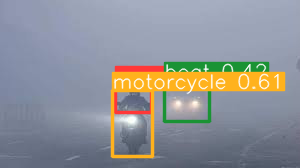

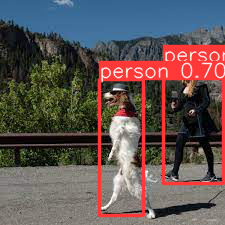

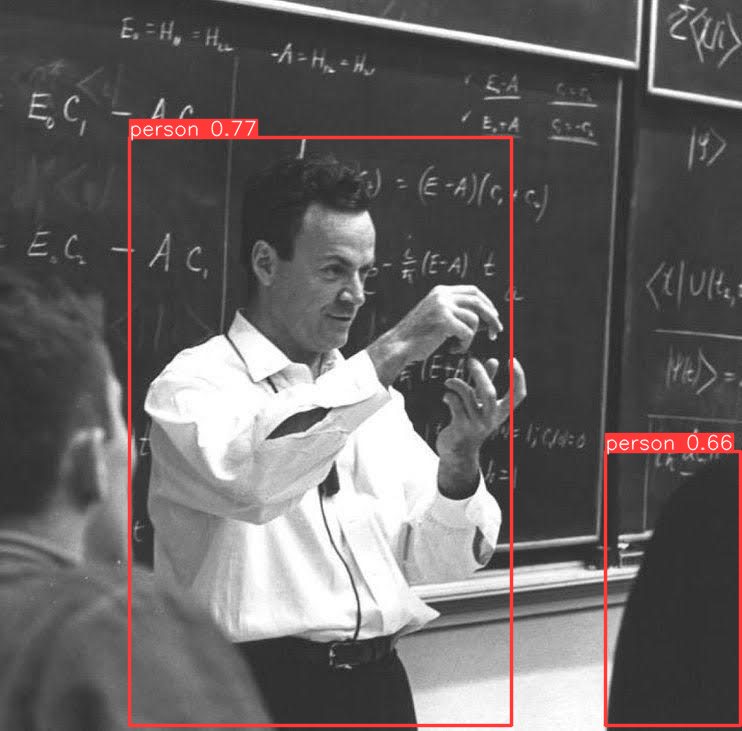

In [5]:
#Insert the inference code here.
d = 'imgs/fail_imgs/'
e = '.jpg'
for s in ['foggy_cars2', 'dog_standing', 'feynman']:
    img = d + s + e
    result = model([img])
    result.show()
    

### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [6]:
display_answer(hw2.answers.part6_q3)



**Your answer:**

first image:<br>
The first picture is an example of a failed classification due to bias. The model classifies the dog walking like a person as a person, because its not used to see dogs walking on 2. The models has a bias that dogs usually are not up straight.<br>
<br>
second image:<br>
this image is an example of bad lighting condition, due to the fog, the model classifies a car as a boat.<br>
<br>
third image:<br>
The model fails to detect the person in the left bottom of the picture. We suspect this stems mainly from the fact the person is partially occluded, and thus missing important features. Though it also may have to do with the fact that he is out of focus, anyway that is the best example of failure due to occlusion we could find.




## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

In [7]:
#insert bonus code here


In [8]:
display_answer(hw2.answers.part6_bonus)



**Your answer:**



